This example is based on the examples posted on GitHub for [Feature Engineering for Machine Learning Course](https://github.com/solegalli/feature-engineering-for-machine-learning)


## Categorical Variables
The values of a categorical variable are selected from a group of **categories**, also called **labels**. Examples are gender (male or female) and marital status (single, married, divorced, or widowed).
Categorical variables can be further categorized into:
- **Ordinal Variables**: can be meaningfully ordered (e.g., height: tall, medium, short)
- **Nominal variables**: no inherent order or ranking

Sometimes categorical variables are coded as numbers (e.g., gender may be coded as 0 for males and 1 for females). The variable is still categorical, despite the use of numbers.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Let's load the loans dataset.
df = pd.read_csv('./datasets/loan.csv')
df.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN


In [3]:
# Let's inspect the variable householder,
# which indicates whether the borrowers own their home,
# or if they are renting, among other things.

df['householder'].unique()

<StringArray>
['RENT', 'OWNER', 'MORTGAGE']
Length: 3, dtype: str

Text(0, 0.5, 'Number of customers')

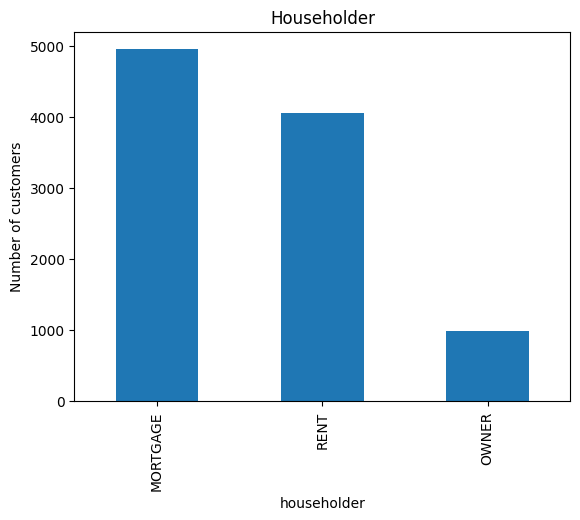

In [4]:
# Let's make a bar plot with the number of loans
# disbursed in each category of home ownership.

# The code below counts the number of observations (customers)
# in each category and then makes a bar plot.
df['householder'].value_counts()

fig = df['householder'].value_counts().plot.bar()
fig.set_title('Householder')
fig.set_ylabel('Number of customers')

The majority of the borrowers either own their house with a mortgage or rent their property. A few borrowers own their homes completely.

In [6]:
df['householder'].value_counts()

householder
MORTGAGE    4957
RENT        4055
OWNER        988
Name: count, dtype: int64

In [5]:
# Value counts can also be expressed as a proportion of the total
df['householder'].value_counts(normalize=True)

householder
MORTGAGE    0.4957
RENT        0.4055
OWNER       0.0988
Name: proportion, dtype: float64

In [7]:
# The "loan_purpose" variable is another categorical variable
# that indicates how the borrowers intend to use the
# money they are borrowing. For example, to improve their
# house, or to cancel previous debt.

df['loan_purpose'].unique()

<StringArray>
['Debt consolidation',       'Car purchase',              'Other',
  'Home improvements',        'Moving home',             'Health',
           'Holidays',            'Wedding']
Length: 8, dtype: str

Debt consolidation means that the borrower will use the loan to cancel previous debts; car purchase means that the borrower will use the money to buy a car; and so on. It gives an idea of the intended use of the loan.

Text(0, 0.5, 'Number of customers')

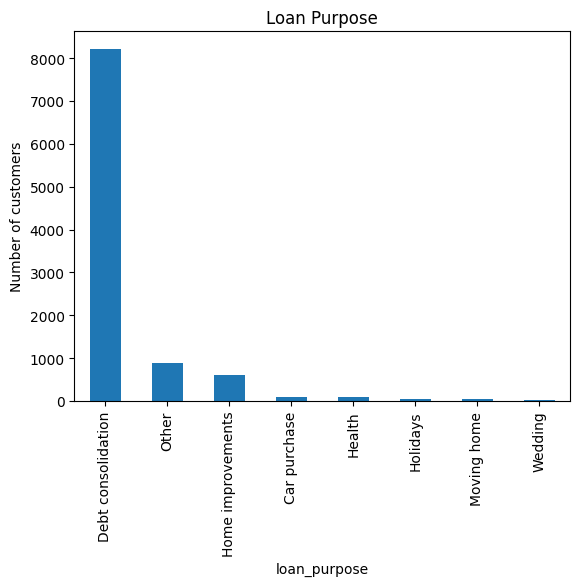

In [8]:
# Let's make a bar plot with the number of borrowers
# in each category.

# The code below counts the number of observations (borrowers)
# per category and then makes a plot.

fig = df['loan_purpose'].value_counts().plot.bar()
fig.set_title('Loan Purpose')
fig.set_ylabel('Number of customers')

The majority of debtors plan to use the money to "consolidate debt." This is a common occurrence. The borrowers want to consolidate all of their debts.

In [ ]:
# Let's look at one additional categorical variable:
# "market", which represents the risk band assigned to the borrower.
df = df.rename(columns={"market": "risk_band"})
df['risk_band'].sort_values().unique()

In [ ]:
# Let's make a bar plot with the number of borrowers
# per category.

fig = df['risk_band'].value_counts().sort_index().plot.bar()
fig.set_title('Status of the Loan')
fig.set_ylabel('Number of customers')

Most customers are assigned to risk bands B and C. A and B are lower risk customers, and E is the highest risk customer. The higher the risk, the more likely the customer is to default; thus, the finance companies charge higher interest rates on those loans.

## Binary variables

In [ ]:
# A binary variable, can take 2 values.
# e.g., variable "loan_status", either the loan is defaulted (1) or not (0).
df = df.rename(columns={"target": "loan_status"})
print(df['loan_status'].unique())
# Value counts of the loan status normalized (percentage)
df['loan_status'].value_counts(normalize=True)

In [ ]:
# Let's make a bar plot with the number of loans per loan status.
loan_status_counts = df['loan_status'].value_counts()
fig = loan_status_counts.plot.bar()
fig.set_title('Status of the Loan')
fig.set_xlabel('Loan Status')
fig.set_ylabel('Number of loans')

for indx, value in enumerate(loan_status_counts):
    fig.text(indx, value, str(value), 
            color = 'brown', fontweight = 'bold')

As we can see, the variable shows only 2 values, 0 and 1, and the majority of the loans have not been defaulted.

In [ ]:
# Let's make a Pie chart showing the % of defaulted (1) or not (0)
loan_status_counts = df['loan_status'].value_counts()
print(loan_status_counts)

loan_status_counts = loan_status_counts.rename({0: 'Paid', 1: 'Defaulted'})
print(loan_status_counts)

plt.pie(x=loan_status_counts.values, labels=loan_status_counts.index, autopct='%1.1f%%')

In [ ]:
# Finally, let's look at a variable that is numerical,
# but its numbers have no real meaning.

df['customer_id'].head()

Each id corresponds to a single consumer. This number is assigned to uniquely identify each customer.

In [ ]:
# The variable has as many different id values as customers:
# in this case 10000.

len(df['customer_id'].unique())

([<matplotlib.patches.Wedge at 0x1e430ee9010>,
 [Text(-0.15654644481792448, 1.0888035684249335, 'Healthy'),
  Text(-0.4569561130830835, -1.000595378120447, 'Prediabetic'),
  Text(0.9253791095416961, -0.5947045515411984, 'Diabetic')],
 [Text(-0.08538896990068608, 0.5938928555045091, '54.5%'),
  Text(-0.24924878895440913, -0.5457792971566074, '27.3%'),
  Text(0.5047522415681978, -0.32438430084065367, '18.2%')])

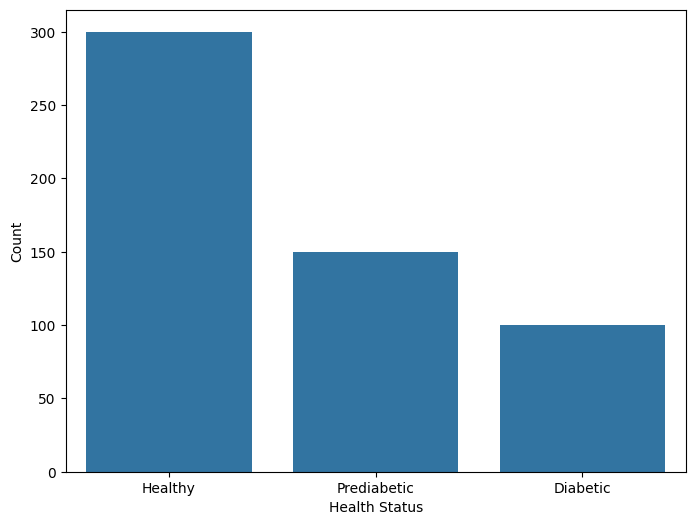

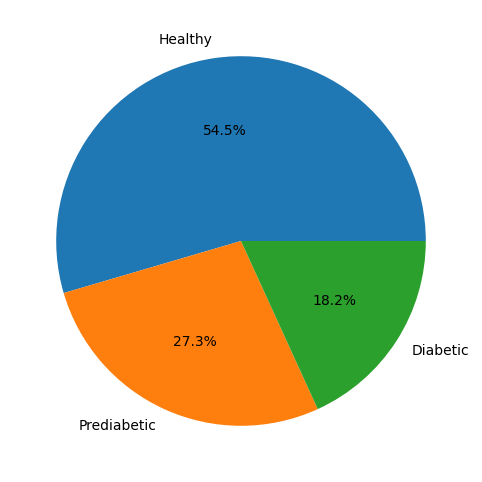

In [9]:
# Another simple bar chat and pie chart example
data = {'Status': ['Healthy', 'Prediabetic', 'Diabetic'],
       'Count': [300, 150, 100]} 

# Bar chart
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Status', y='Count', data=data)
plt.xlabel('Health Status')
plt.ylabel('Count')

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(data['Count'], labels=data['Status'], autopct='%1.1f%%')